<a href="https://colab.research.google.com/github/sriramreddy-7/Generative-AI/blob/main/Apple_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('/content/apple_quality.csv')
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...,...
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 281.4 KB


<Axes: >

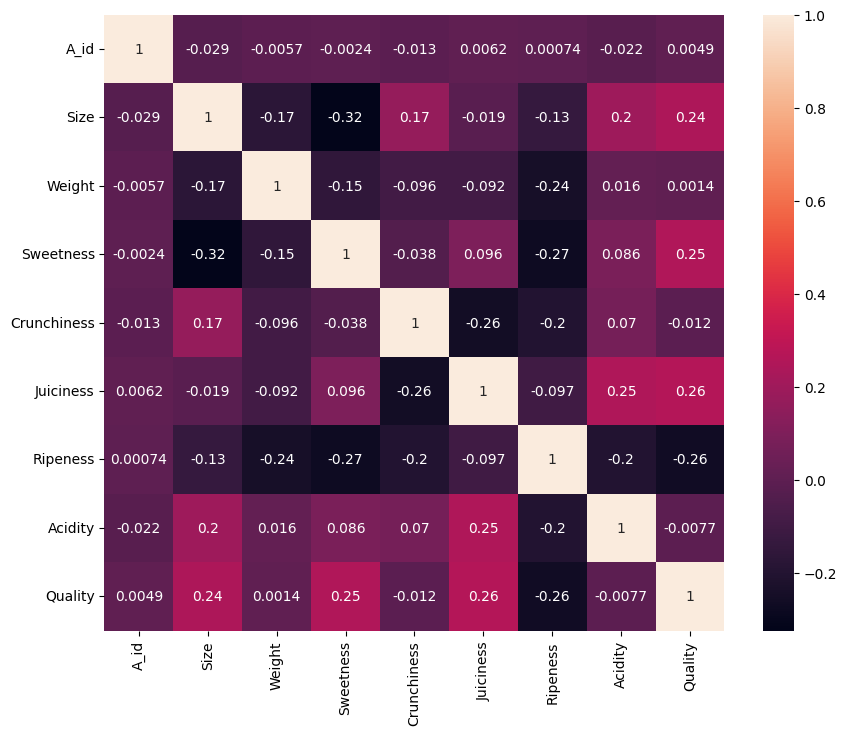

In [4]:
corr = df.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True)

In [5]:
data = df.values
X,y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  # splitting in the ration 80:20

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
classifier = Sequential()

# adding the input layer and the first hidden layer
classifier.add(Dense(units = 500, activation = 'sigmoid', input_dim = 8))

# adding the second hidden layer
classifier.add(Dense(units = 100, activation = 'sigmoid'))

# adding another hidden layer
classifier.add(Dense(units = 50, activation = 'sigmoid'))

# adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

score, acc = classifier.evaluate(X_train, y_train, batch_size = 10)
print('Train score: ', score)
print('Train accuracy: ', acc)

320/320 [==============================] - 1s 1ms/step - loss: 0.5462 - accuracy: 0.7431
Train score:  0.5462141633033752
Train accuracy:  0.7431250214576721


In [8]:
y_pred = classifier.predict(X_test)

score, acc = classifier.evaluate(X_test, y_test, batch_size = 10)
print('Test score:', score)
print('Test accuracy:', acc)

80/80 [==============================] - 0s 2ms/step - loss: 0.5627 - accuracy: 0.7312
Test score: 0.5626965165138245
Test accuracy: 0.731249988079071


In [9]:
y_pred

array([[0.17919645],
       [0.37123474],
       [0.70613533],
       [0.39732185],
       [0.75004333],
       [0.7154224 ],
       [0.70617634],
       [0.06957237],
       [0.18472132],
       [0.6683458 ],
       [0.70610714],
       [0.66738063],
       [0.17919502],
       [0.17909327],
       [0.51304597],
       [0.17165804],
       [0.17919487],
       [0.17921025],
       [0.36577582],
       [0.704837  ],
       [0.70080453],
       [0.17921293],
       [0.1067644 ],
       [0.19572818],
       [0.7099488 ],
       [0.10402929],
       [0.7060985 ],
       [0.17919563],
       [0.17919819],
       [0.1791949 ],
       [0.706066  ],
       [0.44092923],
       [0.45372978],
       [0.6975705 ],
       [0.7062166 ],
       [0.19916216],
       [0.43961737],
       [0.17932357],
       [0.17247456],
       [0.7061649 ],
       [0.18993115],
       [0.17919162],
       [0.69044435],
       [0.22802904],
       [0.17919467],
       [0.70501333],
       [0.18804322],
       [0.288

In [12]:
# converting results into categorical values
for i in range(0, len(y_pred)):
    if y_pred[i][0] >= 0.5:
        y_pred[i][0] = 1
    else:
        y_pred[i][0] = 0
y_pred

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[314, 108],
       [107, 271]])

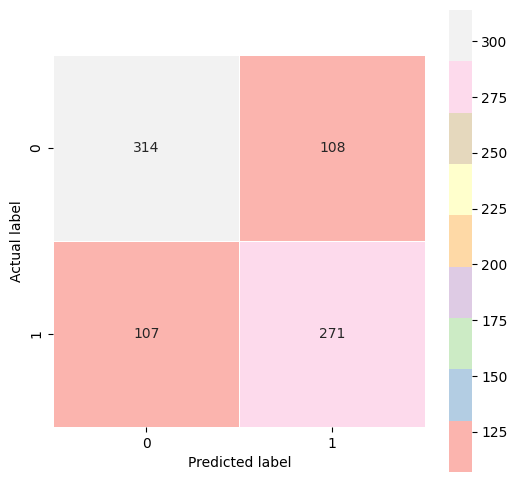

In [14]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [15]:
class_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       422
           1       0.72      0.72      0.72       378

    accuracy                           0.73       800
   macro avg       0.73      0.73      0.73       800
weighted avg       0.73      0.73      0.73       800

